# Data Collection & Pre-processing

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [24]:
df = pd.read_csv("./used_car_dataset.csv")
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2105 non-null   object
 1   car_price_in_rupees  2105 non-null   object
 2   kms_driven           2105 non-null   object
 3   fuel_type            2105 non-null   object
 4   city                 2105 non-null   object
 5   year_of_manufacture  2105 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 98.8+ KB


In [26]:
df['Price'] = df['car_price_in_rupees'].str.extract('([\d.]+)').astype(float) * 100000

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             2105 non-null   object 
 1   car_price_in_rupees  2105 non-null   object 
 2   kms_driven           2105 non-null   object 
 3   fuel_type            2105 non-null   object 
 4   city                 2105 non-null   object 
 5   year_of_manufacture  2105 non-null   int64  
 6   Price                2105 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 115.2+ KB


# Feature Engineering

In [28]:
df['Age'] = 2024-df['year_of_manufacture']

In [29]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

92
0


In [30]:
df['KM'] = df['kms_driven'].apply(lambda x: int(re.sub(r'\D', '', x)))
df['KM'].head()

0    22402
1    10344
2    12999
3    45000
4    11193
Name: KM, dtype: int64

# Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [32]:
df['city'] = label_encoder.fit_transform(df['city'])
df['fuel_type'] = label_encoder.fit_transform(df['fuel_type'])

In [33]:
df = df.drop(['car_name', 'car_price_in_rupees', 'year_of_manufacture', 'kms_driven'], axis=1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2013 entries, 0 to 2104
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fuel_type  2013 non-null   int64  
 1   city       2013 non-null   int64  
 2   Price      2013 non-null   float64
 3   Age        2013 non-null   int64  
 4   KM         2013 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 94.4 KB


In [35]:
df.describe()

,fuel_type,city,Price,Age,KM
count,2013.000000,2013.000000,2.013000e+03,2013.000000,2.013000e+03
mean,4.220566,7.122206,1.111732e+06,6.976155,4.843062e+04
std,2.443809,4.676192,1.210148e+06,2.823402,8.542756e+04
min,0.000000,0.000000,1.100000e+05,2.000000,6.400000e+01
25%,1.000000,3.000000,4.750000e+05,5.000000,2.500000e+04
50%,6.000000,8.000000,6.990000e+05,7.000000,4.282500e+04
75%,6.000000,11.000000,1.150000e+06,9.000000,6.300000e+04
max,7.000000,15.000000,9.900000e+06,20.000000,3.600000e+06


# Outlier Handling

In [36]:
def remove_outliers_iqr(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    df = df[~outliers]

    return df

In [37]:
columns_to_check = df.columns.tolist()

for column in columns_to_check:
    df = remove_outliers_iqr(df, column)

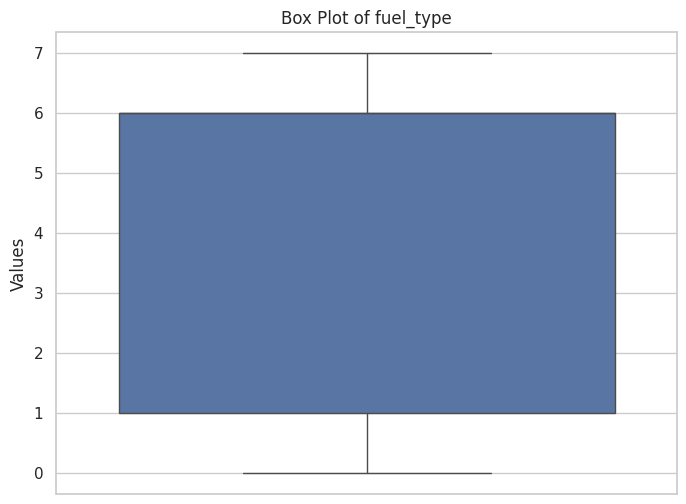

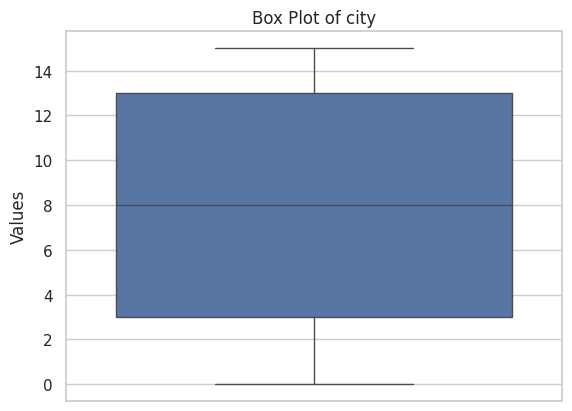

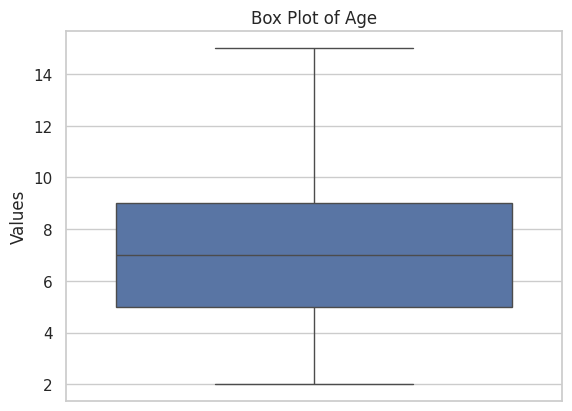

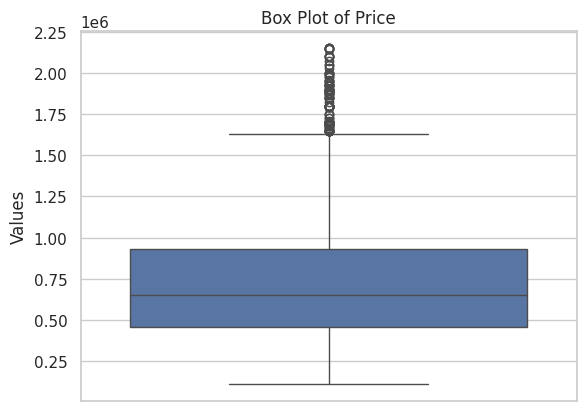

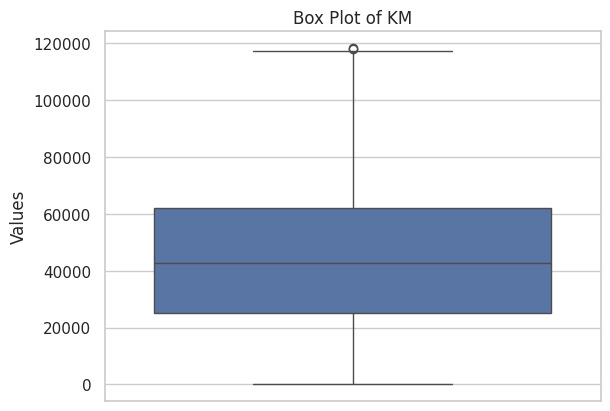

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

columns_to_plot = ['fuel_type', 'city', 'Age', 'Price', 'KM']

for item in columns_to_plot:
  sns.boxplot(data=df[item])

  plt.xlabel("".format(item))
  plt.ylabel("Values")
  plt.title("Box Plot of {}".format(item))
  plt.show()
  print('\n')

In [39]:
column = df.columns.tolist()
for item in column:
  Q1 = df[item].quantile(0.25)
  Q3 = df[item].quantile(0.75)
  IQR = Q3 - Q1
  whisker_width = 1.5
  lower_whisker = Q1 -(whisker_width*IQR)
  upper_whisker = Q3 + (whisker_width*IQR)
  df[item]=np.where(df[item]>upper_whisker,upper_whisker,np.where(df[item]<lower_whisker,lower_whisker,df[item]))

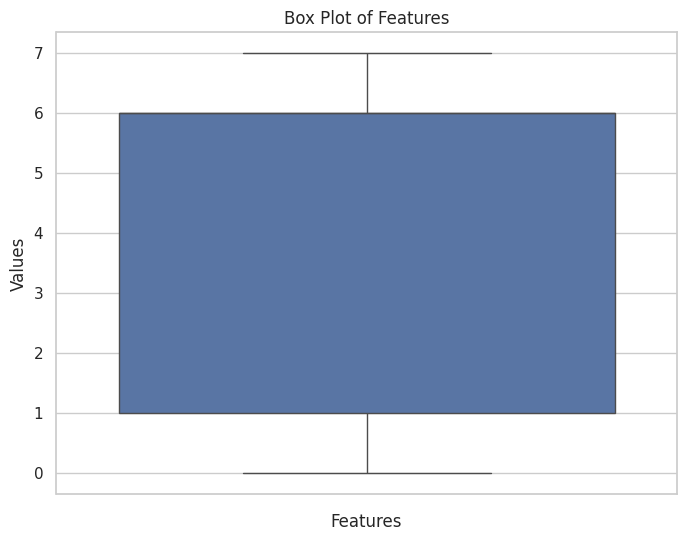

/n


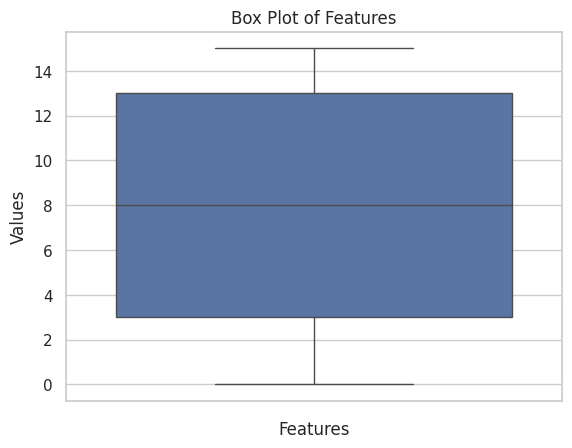

/n


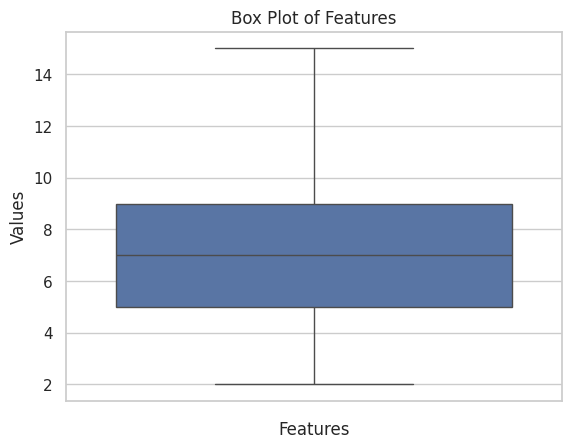

/n


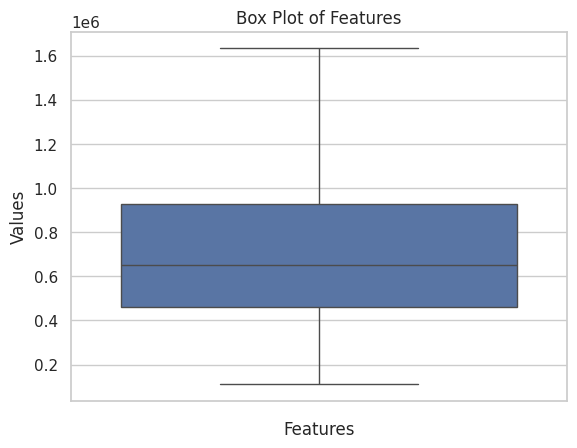

/n


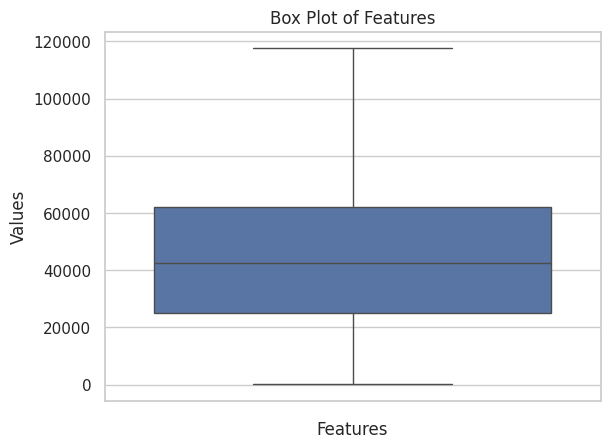

/n


In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

columns_to_plot = ['fuel_type', 'city', 'Age', 'Price', 'KM']

for item in columns_to_plot:
  sns.boxplot(data=df[item])

  plt.xlabel("Features")
  plt.ylabel("Values")
  plt.title("Box Plot of Features")
  plt.show()
  print("/n")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1746 entries, 0 to 2104
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fuel_type  1746 non-null   float64
 1   city       1746 non-null   float64
 2   Price      1746 non-null   float64
 3   Age        1746 non-null   float64
 4   KM         1746 non-null   float64
dtypes: float64(5)
memory usage: 81.8 KB


# Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fuel_type  1746 non-null   float64
 1   city       1746 non-null   float64
 2   Price      1746 non-null   float64
 3   Age        1746 non-null   float64
 4   KM         1746 non-null   float64
dtypes: float64(5)
memory usage: 68.3 KB


# X & Y Split

In [44]:
X = df.drop(['Price'], axis=1)
y = df['Price']

# Train - Test Split

In [45]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [47]:
model1 = RandomForestRegressor()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [48]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [49]:
model3 = DecisionTreeRegressor()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

In [50]:
model4 = KNeighborsRegressor()
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)

In [51]:
model5 = SVR()
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)

# Model Evaluation

In [52]:
print("Random Forest",r2_score(y_test, y_pred1))

Random Forest 0.37559431558600653


In [53]:
print("Linear Regression",r2_score(y_test, y_pred2))

Linear Regression 0.2909252047817328


In [54]:
print("Decision Trees Regression",r2_score(y_test, y_pred3))

Decision Trees Regression -0.03886027911600354


In [55]:
print('KNN',r2_score(y_test, y_pred4))

KNN 0.2986720725784908


In [56]:
print("SVR",r2_score(y_test, y_pred5))

SVR 0.380695077156769
